# Zusammensetzung des Phosphordampfes

In [2]:
from matplotlib import pyplot as plt
from matplotlib import style
from scipy import stats
from scipy import constants as cnst
import numpy as np
import pandas as pd
import glob
from IPython.display import HTML

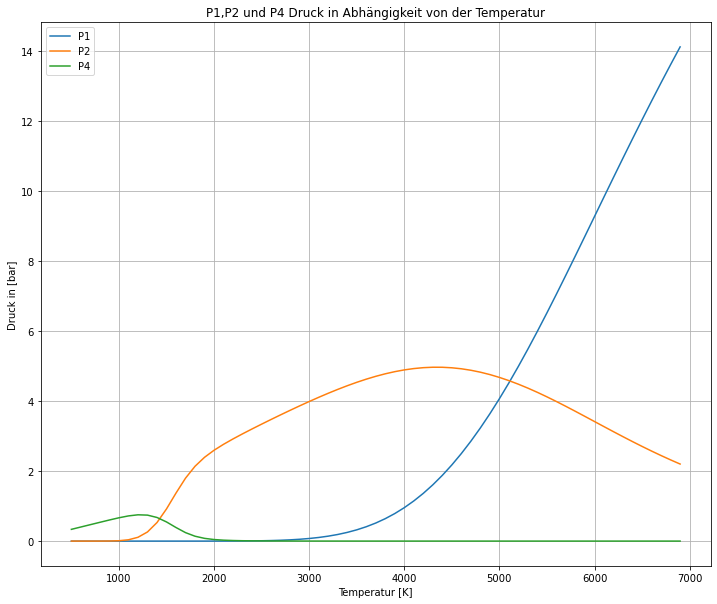

,Temperatur in [K],Druck P1 [bar],Druck P2 [bar],Druck P4 [bar]
0,500,0.0000,0.0000,0.3353
1,600,0.0000,0.0000,0.4023
2,700,0.0000,0.0000,0.4694
3,800,0.0000,0.0003,0.5363
4,900,0.0000,0.0021,0.6024
5,1000,0.0000,0.0103,0.6654
6,1100,0.0000,0.0374,0.7189
7,1200,0.0000,0.1085,0.7504
8,1300,0.0000,0.2606,0.7414
9,1400,0.0000,0.5293,0.6741


In [4]:
#Konstanten
m = 1
R = cnst.R
V = 1e-3
MP4 = 124
H1 = 228900
S1 = 156.2
H2 = 489500
S2 = 108.4

T = np.arange(500,7000,100)
P4 = 1000
lP1 = []
lP2 = []
lP4 = []

i=0
for i in range(len(T)):
    #Berechnung Gleichgewichtskonst
    G1 = H1 - T[i]*S1
    K1 = np.exp(-G1/(R*T[i]))
    G2 = H2 - T[i]*S2
    K2 = np.exp(-G2/(R*T[i]))
    P0 = (m/MP4)*R*(T[i]/V)*1e-5  
    while True:
        P2 = np.sqrt(K1*P4)
        P1 = np.sqrt(K2*P2)
        X = (P4+0.5*P2+0.25*P1)
        if abs(P0/X-1) < 1e-6:
            lP1.append(P1)
            lP2.append(P2)
            lP4.append(P4)
            break
        else:
            P4 = P4 * (P0/X)
fig = plt.figure(figsize=(12, 10)) 
plt.grid(True)
plt.xlabel('Temperatur [K]')
plt.ylabel('Druck in [bar]')
plt.title('P1,P2 und P4 Druck in Abhängigkeit von der Temperatur')
plt.plot(T,lP1,T,lP2,T,lP4)
plt.legend(['P1','P2','P4'])
plt.show()
fig.savefig('test.png')
df_t = pd.DataFrame(data=T,columns=['Temperatur in [K]'])
df_p1 = pd.DataFrame(data=lP1,columns=['Druck P1 [bar]'])
df_p2 = pd.DataFrame(data=lP2,columns=['Druck P2 [bar]'])
df_p4 = pd.DataFrame(data=lP4,columns=['Druck P4 [bar]'])
df = pd.concat([df_t,df_p1,df_p2,df_p4],axis=1)
display(HTML(df.round(4).to_html(index=True)))
df.to_csv('Test.csv')